Estefanía Pérez Yeo - A01639270

---



# Portafolio de Análisis
# Módulo 1 - Utilización, procesamiento y visualización de grandes volúmenes de datos

Mediante el uso de PySpark y con la ayuda de Google Colab se pretende generar 3 modelos, donde acada uno utilice una gran cantidad de datos por medio de MLlib; estos tres modelos son definidos por clasificación, regresión y agrupamiento, donde cada uno manejará datos distintos y se podrá observar una retroalimentación de lo obtenido y observado por modelo.

# Instalar y preparar Google Colab para trabajar con PySpark

In [1]:
#Bibliotecas para poder trabajar con Spark
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
#Configuración de Spark con Python
!pip install -q findspark
!pip install pyspark


Ign:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Ign:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,131 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,400 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,274 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/univers

## Instalar java

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null


## Descargar e instalar Spark

In [3]:
!wget -q https://dlcdn.apache.org/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar xf spark-3.5.0-bin-hadoop3.tgz


## Configurar ambiente de variables

In [4]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"



## Instalar findspark y pyspark

In [5]:
!pip install -q findspark


In [6]:
import findspark
findspark.init()


## Comenzar una SparkSession

In [7]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Colab_Spark_3.5.0").getOrCreate()


# Genera un modelo de regresión utilizando PySpark y MLlib

## Importar datos de Github

Para poder generar los modelos de una forma más funcional, se puede instalar el folder completo que proviene de la liga de Github incluida en la actividad

https://github.com/apache/spark/tree/master/data/mllib

Una vez importada y aprovechando las herramientas de Google Colab, la carga de los datos será a partir del apartado de "Archivos" el cual es llamado dentro del código como "/content/".

### Instalar Subversion (svn)

In [8]:
!apt-get install -yq subversion


Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 libutf8proc2
Suggested packages:
  db5.3-util libapache2-mod-svn subversion-tools
The following NEW packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 libutf8proc2 subversion
0 upgraded, 6 newly installed, 0 to remove and 19 not upgraded.
Need to get 2,672 kB of archives.
After this operation, 10.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libapr1 amd64 1.7.0-8ubuntu0.22.04.1 [108 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libaprutil1 amd64 1.6.1-5ubuntu4.22.04.2 [92.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libserf-1-1 amd64 1.3.9-10ubuntu2 [50.0 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libutf8proc2 amd64 2.7.0-3 [73.9 kB]
Get:5 http://archive.ubuntu.com/ubun

### Usar svn para exportar (download) del directorio:

In [9]:
!svn export https://github.com/apache/spark/trunk/data/mllib


A    mllib
A    mllib/als
A    mllib/als/sample_movielens_ratings.txt
A    mllib/als/test.data
A    mllib/gmm_data.txt
A    mllib/images
A    mllib/images/license.txt
A    mllib/images/origin
A    mllib/images/origin/kittens
A    mllib/images/origin/kittens/29.5.a_b_EGDP022204.jpg
A    mllib/images/origin/kittens/54893.jpg
A    mllib/images/origin/kittens/DP153539.jpg
A    mllib/images/origin/kittens/DP802813.jpg
A    mllib/images/origin/kittens/not-image.txt
A    mllib/images/origin/license.txt
A    mllib/images/origin/multi-channel
A    mllib/images/origin/multi-channel/BGRA.png
A    mllib/images/origin/multi-channel/BGRA_alpha_60.png
A    mllib/images/origin/multi-channel/chr30.4.184.jpg
A    mllib/images/origin/multi-channel/grayscale.jpg
A    mllib/kmeans_data.txt
A    mllib/pagerank_data.txt
A    mllib/pic_data.txt
A    mllib/ridge-data
A    mllib/ridge-data/lpsa.data
A    mllib/sample_binary_classification_data.txt
A    mllib/sample_fpgrowth.txt
A    mllib/sample_isotonic_regres

### Verificar contenidos

In [10]:
!ls mllib


als					    sample_kmeans_data.txt
gmm_data.txt				    sample_lda_data.txt
images					    sample_lda_libsvm_data.txt
kmeans_data.txt				    sample_libsvm_data.txt
pagerank_data.txt			    sample_linear_regression_data.txt
pic_data.txt				    sample_movielens_data.txt
ridge-data				    sample_multiclass_classification_data.txt
sample_binary_classification_data.txt	    sample_svm_data.txt
sample_fpgrowth.txt			    streaming_kmeans_data_test.txt
sample_isotonic_regression_libsvm_data.txt


## Regresión Lineal

In [11]:
from pyspark.ml.regression import LinearRegression

# Load training data
training = spark.read.format("libsvm")\
    .load("/content/mllib/sample_linear_regression_data.txt")

lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(training)

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

Coefficients: [0.0,0.3229251667740594,-0.3438548034562219,1.915601702345841,0.05288058680386255,0.765962720459771,0.0,-0.15105392669186676,-0.21587930360904645,0.2202536918881343]
Intercept: 0.15989368442397356
numIterations: 6
objectiveHistory: [0.49999999999999994, 0.4967620357443381, 0.49363616643404634, 0.4936351537897608, 0.4936351214177871, 0.49363512062528014, 0.4936351206216114]
+--------------------+
|           residuals|
+--------------------+
|  -9.889232683103197|
|  0.5533794340053553|
|  -5.204019455758822|
| -20.566686715507508|
|    -9.4497405180564|
|  -6.909112502719487|
|  -10.00431602969873|
|  2.0623978070504845|
|  3.1117508432954772|
|  -15.89360822941938|
|  -5.036284254673026|
|  6.4832158769943335|
|  12.429497299109002|
|  -20.32003219007654|
|    -2.0049838218725|
| -17.867901734183793|
|   7.646455887420495|
| -2.2653482182417406|
|-0.10308920436195645|
|  -1.380034070385301|
+--------------------+
only showing top 20 rows

RMSE: 10.189077
r2: 0.022861


#### Scatter plot de residuos

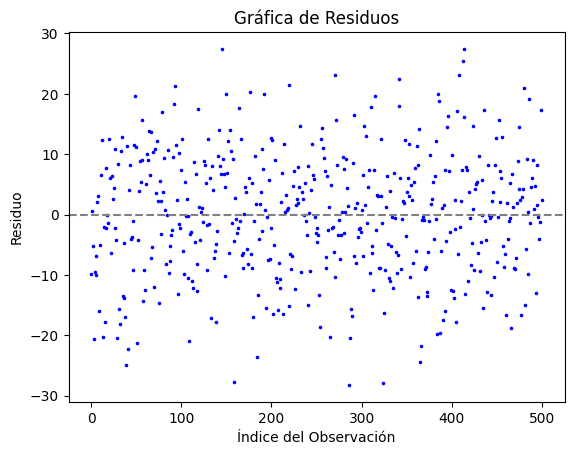

In [12]:
import matplotlib.pyplot as plt

# Recopila los residuos a nivel local
residuals = trainingSummary.residuals.rdd.map(lambda row: row[0]).collect()

# Crea una figura y un eje
fig, ax = plt.subplots()

# Grafica los residuos
ax.scatter(range(len(residuals)), residuals, color='blue', s=2.5)

# Dibuja una línea horizontal punteada gris a través del eje x
ax.axhline(y=0, color='gray', linestyle='dashed')

# Establece los títulos y las etiquetas
ax.set_title('Gráfica de Residuos')
ax.set_xlabel('Índice del Observación')
ax.set_ylabel('Residuo')

# Muestra la gráfica
plt.show()


Analizando la salida de Regresión Lineal se pueden observar primero los valores de coeficientes obtenidos, donde tanto el primer como el séptimo coeficiente muestran 0.0 lo que indica que estos predictores no tienen efecto en la variable dependiente al considerar los otros predictores. En cuanto al segundo, cuarto, sexto y décimo coeficiente considerados como positivos, implican que a medida que el predictor aumenta, la variable de respuesta también aumenta. Por último el tercer, octavo y noveno coeficiente considerados como negativos, sugieren que a medida que el predictor aumenta, la variable de respuesta disminuye.

Gracias a la variable numIterations se sabe que el modelo tardó 6 iteraciones en converger lo que sugiere que el algorimo el 6 pasos encontró los mejores parámetros.

Los 20 residuales ostrados representan la diferencia entre los valores observados y los valores predichos. Aquellos valores alejados de 0 indican posibles valores atípicos.

RMSE (Error Cuadrático Medio Raíz) indica la diferencia entre el valor predicho y el valor actual, y en cuanto menor sea el RMSE, mejor será el modelo, de esta forma tomando en cuenta el dominio este valor es alto.

El R2 se toma en cuenta para las predicciones del modelo, donde entre más cercano sea a 1 mejor se ajusta el modelo a futuros valores; tomando en cuenta esto y observando el 0.022861 se concluye que este modelo de regresión no es bueno.

# Genera un modelo de clasificación utilizando PySpark y MLlib

## Regresión Logística Multinomial

In [13]:
from pyspark.ml.classification import LogisticRegression

# Load training data
training = spark \
    .read \
    .format("libsvm") \
    .load("/content/mllib/sample_multiclass_classification_data.txt")

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(training)

# Print the coefficients and intercept for multinomial logistic regression
print("Coefficients: \n" + str(lrModel.coefficientMatrix))
print("Intercept: " + str(lrModel.interceptVector))

print('\n')

trainingSummary = lrModel.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

print('\n')

# for multiclass, we can inspect metrics on a per-label basis
print("False positive rate by label:")
for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print('\n')

print("True positive rate by label:")
for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print('\n')

print("Precision by label:")
for i, prec in enumerate(trainingSummary.precisionByLabel):
    print("label %d: %s" % (i, prec))

print('\n')

print("Recall by label:")
for i, rec in enumerate(trainingSummary.recallByLabel):
    print("label %d: %s" % (i, rec))

print('\n')

print("F-measure by label:")
for i, f in enumerate(trainingSummary.fMeasureByLabel()):
    print("label %d: %s" % (i, f))

print('\n')

accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
fMeasure = trainingSummary.weightedFMeasure()
precision = trainingSummary.weightedPrecision
recall = trainingSummary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

Coefficients: 
3 X 4 CSRMatrix
(0,3) 0.305
(1,2) -0.7666
(1,3) -0.3854
Intercept: [0.05192580020728831,-0.12619173083598803,0.07426593062869971]


objectiveHistory:
1.098612288668108
1.0767872580801818
1.0324898663050683
1.0276148685544233
1.0292979666409194
1.0238563624020458
1.0236260835897755
1.0235478802964153
1.0231925082158748
1.0231565244620064
1.0229939986213705


False positive rate by label:
label 0: 0.22
label 1: 0.05
label 2: 0.0


True positive rate by label:
label 0: 1.0
label 1: 1.0
label 2: 0.46


Precision by label:
label 0: 0.6944444444444444
label 1: 0.9090909090909091
label 2: 1.0


Recall by label:
label 0: 1.0
label 1: 1.0
label 2: 0.46


F-measure by label:
label 0: 0.819672131147541
label 1: 0.9523809523809523
label 2: 0.6301369863013699


Accuracy: 0.82
FPR: 0.09
TPR: 0.82
F-measure: 0.800730023276621
Precision: 0.8678451178451179
Recall: 0.82


#### Gráfico de barras por métrica

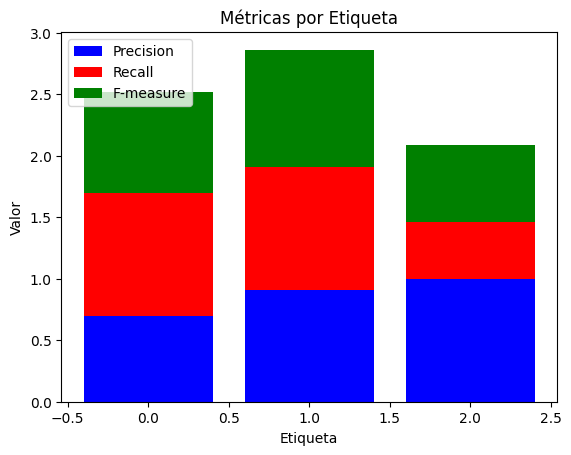

In [14]:
labels = [i for i in range(len(trainingSummary.precisionByLabel))]
plt.bar(labels, trainingSummary.precisionByLabel, color='blue', label='Precision')
plt.bar(labels, trainingSummary.recallByLabel, bottom=trainingSummary.precisionByLabel, color='red', label='Recall')
plt.bar(labels, trainingSummary.fMeasureByLabel(), bottom=[i+j for i,j in zip(trainingSummary.precisionByLabel, trainingSummary.recallByLabel)], color='green', label='F-measure')
plt.xlabel('Etiqueta')
plt.ylabel('Valor')
plt.title('Métricas por Etiqueta')
plt.legend(loc="upper left")
plt.show()


Los coeficientes mostrados a un inicio muestran una matriz CSR (Compressed Sparse Row) con las ubicaciones de los elementos no nulos. Por ejemplo, el coeficiente (0,3) 0.305 indica que la primera clase (label 0) tiene un coeficiente asociado de 0.305 para la cuarta feature.

False positive rate & True positive rate indican la proporción de tanto falsos positivos que se clasificaron incorrectamente como positivos reales que se clasificaron correctamente; tomando en cuenta esto y observando los resultados por ejemplo el label 0 y label 1 tiene un rate del 100% en cuanto a positivos reales lo cual es un buen valor dentro del modelo.

Finalmente, observando las métricas globales el Accuracy obtenido es de un 82% lo cual indica que el modelo clasifica correctamente el 82% de las instancias donde subjetivamente hablando es bueno más no el mejor valor. FPR (Tasa de falsos positivos) indica el promedio de falsos positivos donde un 9% es un buen porcentaje ya este valor es preferible mantenerlo bajo a diferencia de TPR el cual muestra la Tasa de postivos reales en un 82%. Una presición de 86% también muestra un valor alto más no el mejor en cuanto a la presición, valga la redundancia, de todas las clases.

En conclusión el modelo tiene un buen rendimiento para las etiquetas 0 y 1, pero muestra espacio para mejorar en la etiqueta 2.

# Genera un agrupamiento utilizando PySpark y MLlib

## Clusterización

K-means (2 clusters)

In [18]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Loads data.
dataset = spark.read.format("libsvm").load("/content/mllib/sample_kmeans_data.txt")

# Trains a k-means model.
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(dataset)

# Make predictions
predictions = model.transform(dataset)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.9997530305375207
Cluster Centers: 
[9.1 9.1 9.1]
[0.1 0.1 0.1]


La métrica Silhouette oscila entre -1 y 1, donde un valor entre más cercano a 1 indica que los objetos están bien emparejados con su propio cluster y tienen un mal emparejamiento con los clusters vecinos. Observando el valor obtenido de 0.999, el cual es muy cerca de 1, los puntos se encuentran muy cerca de sus centroides y lejos de los que no les corresponden; por ende, una configuración de 2 clusters fue una buena desición.

#### DataFrame de PySpark a Pandas DataFrame

In [19]:
import pandas as pd
pdf = predictions.toPandas()


In [22]:
pdf.head()

,label,features,prediction
0,0.0,"(0.0, 0.0, 0.0)",1
1,1.0,"(0.1, 0.1, 0.1)",1
2,2.0,"(0.2, 0.2, 0.2)",1
3,3.0,"(9.0, 9.0, 9.0)",0
4,4.0,"(9.1, 9.1, 9.1)",0


#### Gráfico de dispersión

Separar dimensiones

In [23]:
pdf['x'] = pdf['features'].apply(lambda vec: vec[0])
pdf['y'] = pdf['features'].apply(lambda vec: vec[1])


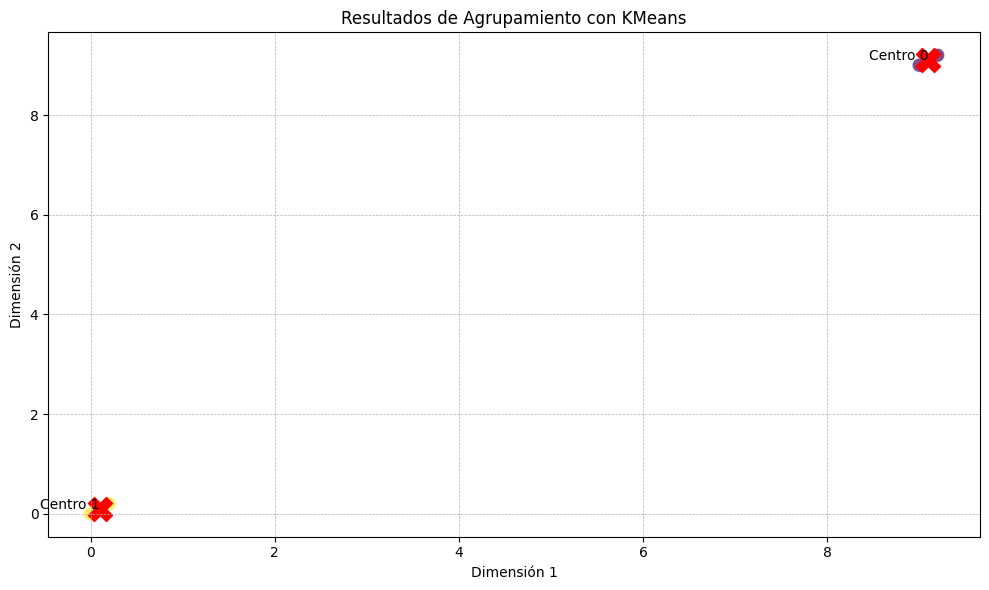

In [27]:
# Crea un espacio para la gráfica
plt.figure(figsize=(10, 6))

# Dibuja los puntos de datos con opacidad y tamaño ajustados
plt.scatter(pdf['x'], pdf['y'], c=pdf['prediction'], cmap='viridis', alpha=0.7, s=100, edgecolors='w', linewidth=0.5)

# Dibuja y anota los centros de los clústeres
for i, centro in enumerate(centers):
    plt.scatter(centro[0], centro[1], s=300, c='red', marker='X')
    plt.text(centro[0], centro[1], f'Centro {i}', fontsize=10, ha='right')

# Ajusta las etiquetas y título
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Resultados de Agrupamiento con KMeans')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Muestra la gráfica
plt.show()